In [6]:
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard

In [2]:
data = pd.read_csv("../materials/DATA/cancer_classification.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<Axes: xlabel='benign_0__mal_1', ylabel='count'>

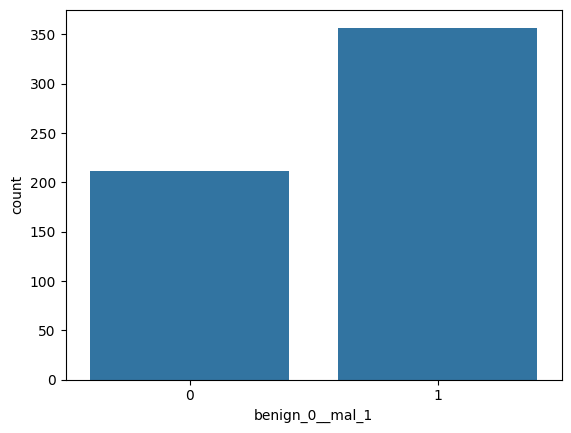

In [5]:
sns.countplot(x="benign_0__mal_1", data=data)

<Axes: >

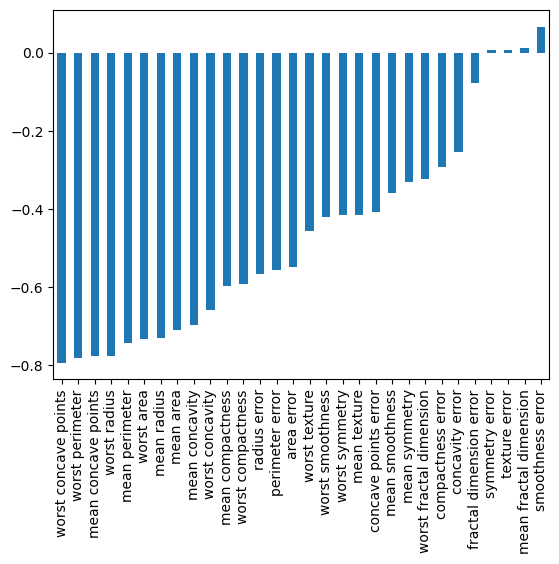

In [6]:
data.corr()["benign_0__mal_1"].sort_values()[:-1].plot(kind="bar")

In [7]:
x = data.drop("benign_0__mal_1", axis=1).values
y = data["benign_0__mal_1"].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=101)

In [8]:
scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [9]:
model_overfit = Sequential()

model_overfit.add(Dense(30, activation="relu"))
model_overfit.add(Dense(15, activation="relu"))
model_overfit.add(Dense(1, activation="sigmoid"))

model_overfit.compile(loss="binary_crossentropy", optimizer="adam")

In [10]:
model_overfit.fit(x=x_train, y=y_train, epochs=600, validation_data=(x_test, y_test))

Epoch 1/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6826 - val_loss: 0.6564
Epoch 2/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6394 - val_loss: 0.6206
Epoch 3/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6068 - val_loss: 0.5838
Epoch 4/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5633 - val_loss: 0.5410
Epoch 5/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5167 - val_loss: 0.4963
Epoch 6/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4686 - val_loss: 0.4496
Epoch 7/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4342 - val_loss: 0.4035
Epoch 8/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3837 - val_loss: 0.3564
Epoch 9/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3568 - val_loss: 0.3167
Epoch 10/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3076 - val_loss: 0.2823
Epoch 11/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2790 - val_loss: 0.2519
Epoch 12/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2

<Axes: >

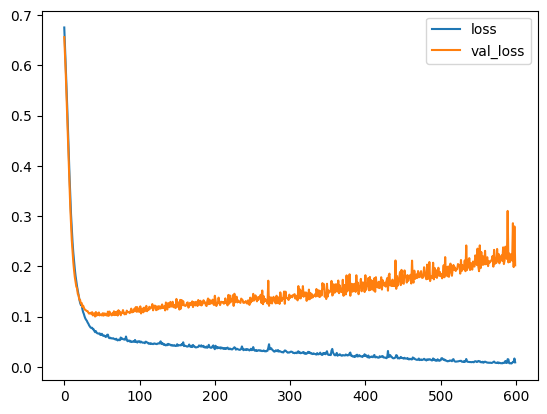

In [11]:
pd.DataFrame(model_overfit.history.history).plot()

In [13]:
model_early_stop = Sequential()

model_early_stop.add(Dense(30, activation="relu"))
model_early_stop.add(Dense(15, activation="relu"))
model_early_stop.add(Dense(1, activation="sigmoid"))

model_early_stop.compile(loss="binary_crossentropy", optimizer="adam")

In [14]:
model_early_stop.fit(
    x=x_train,
    y=y_train,
    epochs=600,
    validation_data=(x_test, y_test),
    callbacks=[
        EarlyStopping(monitor="val_loss", mode="min", patience=25)
    ]
)

Epoch 1/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7047 - val_loss: 0.6709
Epoch 2/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6737 - val_loss: 0.6537
Epoch 3/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6510 - val_loss: 0.6322
Epoch 4/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6269 - val_loss: 0.6053
Epoch 5/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5952 - val_loss: 0.5752
Epoch 6/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5685 - val_loss: 0.5405
Epoch 7/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5440 - val_loss: 0.5022
Epoch 8/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5012 - val_loss: 0.4623
Epoch 9/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4572 - val_loss: 0.4184
Epoch 10/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4146 - val_loss: 0.3785
Epoch 11/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3812 - val_loss: 0.3392
Epoch 12/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3

<Axes: >

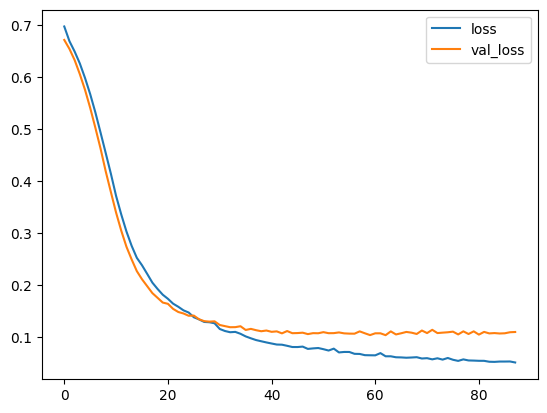

In [15]:
pd.DataFrame(model_early_stop.history.history).plot()

In [17]:
model_dropout = Sequential()

model_dropout.add(Dense(30, activation="relu"))
model_dropout.add(Dropout(0.5))
model_dropout.add(Dense(15, activation="relu"))
model_dropout.add(Dropout(0.5))
model_dropout.add(Dense(1, activation="sigmoid"))

model_dropout.compile(loss="binary_crossentropy", optimizer="adam")

In [18]:
model_dropout.fit(
    x=x_train,
    y=y_train,
    epochs=600,
    validation_data=(x_test, y_test),
    callbacks=[
        EarlyStopping(monitor="val_loss", mode="min", patience=25)
    ]
)

Epoch 1/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.7018 - val_loss: 0.6616
Epoch 2/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6761 - val_loss: 0.6437
Epoch 3/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6502 - val_loss: 0.6282
Epoch 4/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6553 - val_loss: 0.6092
Epoch 5/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6247 - val_loss: 0.5910
Epoch 6/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6123 - val_loss: 0.5687
Epoch 7/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5756 - val_loss: 0.5446
Epoch 8/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5880 - val_loss: 0.5207
Epoch 9/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5641 - val_loss: 0.4961
Epoch 10/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5497 - val_loss: 0.4691
Epoch 11/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5275 - val_loss: 0.4452
Epoch 12/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4

<Axes: >

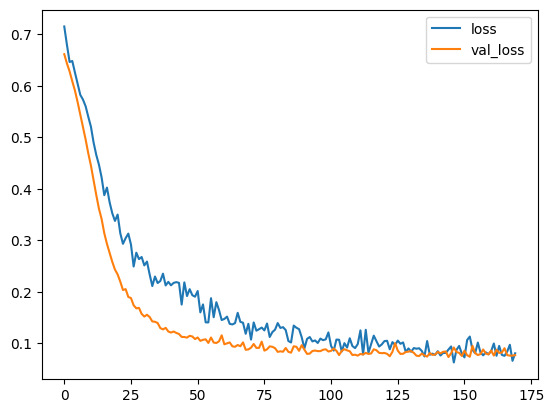

In [19]:
pd.DataFrame(model_dropout.history.history).plot()

In [27]:
predictions = (model_dropout.predict(x_test) > 0.5).astype(int)

print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step


'              precision    recall  f1-score   support\n\n           0       0.96      0.98      0.97        55\n           1       0.99      0.98      0.98        88\n\n    accuracy                           0.98       143\n   macro avg       0.98      0.98      0.98       143\nweighted avg       0.98      0.98      0.98       143\n'

In [2]:
board = TensorBoard(
    log_dir="logs/fit",
    histogram_freq=1,
    write_graph=True,
    write_images=True,
    update_freq='epoch',
    profile_batch=2,
    embeddings_freq=1
)

2024-10-15 10:19:37.884496: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:103] Profiler session initializing.
2024-10-15 10:19:37.884510: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:118] Profiler session started.
2024-10-15 10:19:37.885394: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:130] Profiler session tear down.


In [7]:
model_board = Sequential()

model_board.add(Dense(30, activation="relu"))
model_board.add(Dropout(0.5))
model_board.add(Dense(15, activation="relu"))
model_board.add(Dropout(0.5))
model_board.add(Dense(1, activation="sigmoid"))

model_board.compile(loss="binary_crossentropy", optimizer="adam")

In [ ]:
model_board.fit(
    x=x_train, 
    y=y_train, 
    epochs=600,
    validation_data=(x_test, y_test),
    verbose=1,
    callbacks=[
        EarlyStopping(monitor="val_loss", mode="min", patience=25),
        board
    ]
)